## Supervised Learning - Linear Regression

### Context

* Retail - how much daily, monthly, yearly sale would be for a store?
* Manufacturing - how much will be the productwise manufacturing cost?
* Banking - what will be the credit score of a customer?
* Insurance - how many people will claim insurance this year?

#### Student Score vs. Hours of Study Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load the data
df = pd.read_csv('Data/Grade_Set_1.csv')
print(df)


   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


above figure represents hours that a student studied to the test grade s/he secured

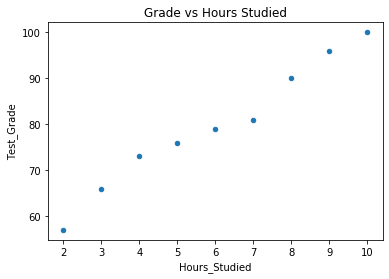

In [5]:
# Given that these two values are continuous, we used scatter plot to print the releationship
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

In [6]:
# Using corr function we validate correlation between 2 variables
print("Correlation Matrix: ")
print(df.corr())

Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


Both the scatter plot and correlation reveals that there is a positive correlation between the variables

### Correlation & Causation

Note - correlation does not imply causation, however the reverse is always true

Typically high correlation can be observed
* due to small sample size
* influence of one variable over the other
* influence of undocumented variables on the two variables in question

### Fitting the slope

A linear regression can be formed from a simple straight line equation like y = mx + c; error happens when actual value stays above or below the straight line.
Because of the self - cancelling nature of the errors, they are squared - added and minimized - giving the name of the straight line as least square line

##### simple linear regression implementation

In [7]:
# importing linear regression function
import sklearn.linear_model as lm

# initialize linear regression object
lr = lm.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* fit_intercept - Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered and the line is expected to pass by origin).
* n_jobs - number of jobs to execute to perform the regression
* normalize - This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [8]:
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


In [9]:
x = df.Hours_Studied.values # independent variable
x

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
x= df.Hours_Studied[:, np.newaxis] # constructing the independent variable by increasing it's dimension from 1 to 2
x

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [11]:
x.shape

(9, 1)

by changing the dimension we created an array of 9 samples for 1 feature

In [12]:
y= df.Test_Grade.values # dependent variable 
y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [13]:
y.shape

(9,)

In [14]:
# train the model using training set
thisLr = lr.fit(x,y)

* X{array-like, sparse matrix} of shape (n_samples, n_features) Training data
* yarray-like of shape (n_samples,) or (n_samples, n_targets) Target values. Will be cast to X’s dtype if necessary

In [15]:
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

Intercept:  49.67777777777776
Coefficient:  [5.01666667]


let's try building the equation manually and predict

In [15]:
# how much marks the student gets if s/he studies 10 hours?
49.67777777777776 + 5.01666667 * 10

99.84444447777776

let's try to predict via the model

In [16]:
print("Using predict function: ", lr.predict([[10]]))

Using predict function:  [99.84444444]


### Printing the line

Text(0.5, 0, 'Hours_Studied')

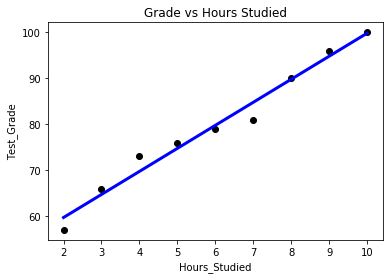

In [17]:
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

### Model Performance Evaluation

* R-Squared - indicates fraction of total variations of dependent variable as explained by independent variable; value belongs to a range of 0 - 1; closer the value to 1, better the model

In [18]:
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


In [19]:
df["Predicted_Test_Grade"] = lr.predict(df.Hours_Studied[:, np.newaxis])
print(df)

   Hours_Studied  Test_Grade  Predicted_Test_Grade
0              2          57             59.711111
1              3          66             64.727778
2              4          73             69.744444
3              5          76             74.761111
4              6          79             79.777778
5              7          81             84.794444
6              8          90             89.811111
7              9          96             94.827778
8             10         100             99.844444


In [20]:
# find mean of dependent variable
mean_test_grade = df.Test_Grade.mean()
mean_test_grade

79.77777777777777

In [21]:
df["Sum_of_Square_Total"] = pow((df.Test_Grade - mean_test_grade),2)
df

,Hours_Studied,Test_Grade,Predicted_Test_Grade,Sum_of_Square_Total
0,2,57,59.711111,518.827160
1,3,66,64.727778,189.827160
2,4,73,69.744444,45.938272
3,5,76,74.761111,14.271605
4,6,79,79.777778,0.604938
5,7,81,84.794444,1.493827
6,8,90,89.811111,104.493827
7,9,96,94.827778,263.160494
8,10,100,99.844444,408.938272


In [22]:
df["Sum_of_Square_Residual"] = pow((df.Predicted_Test_Grade - mean_test_grade),2)
df

,Hours_Studied,Test_Grade,Predicted_Test_Grade,Sum_of_Square_Total,Sum_of_Square_Residual
0,2,57,59.711111,518.827160,402.671111
1,3,66,64.727778,189.827160,226.502500
2,4,73,69.744444,45.938272,100.667778
3,5,76,74.761111,14.271605,25.166944
4,6,79,79.777778,0.604938,0.000000
5,7,81,84.794444,1.493827,25.166944
6,8,90,89.811111,104.493827,100.667778
7,9,96,94.827778,263.160494,226.502500
8,10,100,99.844444,408.938272,402.671111


In [23]:
sst = df.Sum_of_Square_Total.sum()
sst

1547.5555555555557

In [24]:
ssr = df.Sum_of_Square_Residual.sum()
ssr

1510.0166666666673

In [25]:
computed_r_square = ssr / sst
computed_r_square

0.9757431074095351

#### Root Mean Square Error & Mean Absolute Error
* Root Mean Square Error - is square root of the mean of squared error; lower it is better is the model; unit is same as target variable
* Mean Absolute Error - is average of the absolute error

In [26]:
# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

print("R Squared using built-in function: ", r2_score(df.Test_Grade,  df.Predicted_Test_Grade))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Predicted_Test_Grade))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Predicted_Test_Grade)))

R Squared using built-in function:  0.9757431074095347
Mean Absolute Error:  1.618518518518523
Root Mean Squared Error:  2.0422995995497297
